In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from livelossplot import PlotLossesKeras
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


Instructions for updating:
Use the retry module or similar alternatives.


In [3]:
from pickers import picker_simple, picker_max_min, picker_margin, picker_entropy, picker_ensemble, picker_2max

In [19]:
from active_learning_aug import train

In [5]:
from initial_data_strategy import random_strategy, the_closest_in_cluster, the_furthest_in_cluster, middle_in_cluster

In [6]:
from utils import create_plot

In [7]:
metrices_names = ["Loss", "Accuracy", "Precission", "Recall", "F1"]

In [8]:
callbacks=[
    PlotLossesKeras(max_cols=3),
    EarlyStopping(monitor="val_loss", patience=4)
]

## Mnist

In [9]:
from preprocessing_data import load_mnist_data
from models import build_model_mnist

In [10]:
#Get data
(x_train, y_train),(x_test, y_test) = load_mnist_data()

In [11]:
X = (x_train, x_test)
Y = (y_train, y_test)

### Applied model

In [20]:
image_generator = ImageDataGenerator(
            rotation_range=10,
            zoom_range = 0.05, 
            width_shift_range=0.05,
            height_shift_range=0.05,
            horizontal_flip=False,
            vertical_flip=False, 
            data_format="channels_last",
            zca_whitening=True)

image_gen.fit(x_train, augment=True)

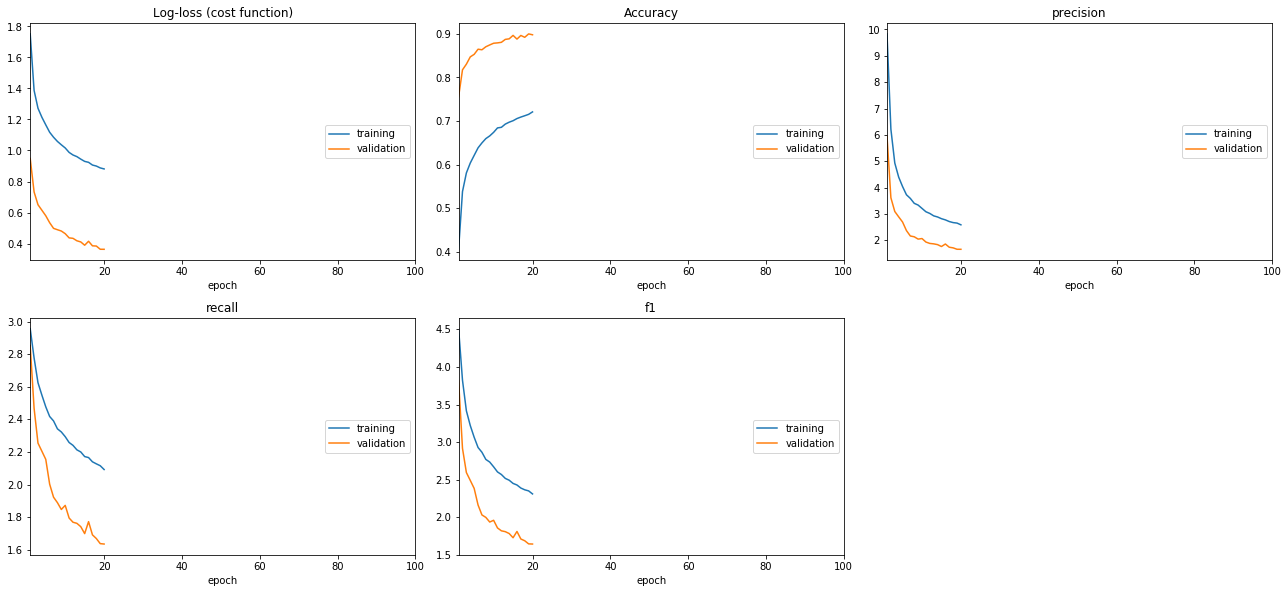

468/468 [==============================] - 13s 28ms/step - loss: 0.8811 - acc: 0.7211 - precision: 2.5868 - recall: 2.0921 - f1: 2.3110 - val_loss: 0.3628 - val_acc: 0.8980 - val_precision: 1.6581 - val_recall: 1.6350 - val_f1: 1.6445
Epoch 21/100
 40/468 [=>............................] - ETA: 9s - loss: 0.8690 - acc: 0.7194 - precision: 2.5834 - recall: 2.0957 - f1: 2.3119

In [ ]:
model_mnist = build_model_mnist()
model_mnist.fit_generator(image_gen.flow(x_train, y_train, batch_size=128),
        steps_per_epoch=x_train.shape[0]//128,
        validation_data=[x_test, y_test],
        epochs=100,
        callbacks=callbacks)

### Initial data: Random

In [16]:
initial_data_random = random_strategy(x_train, initial_data_size=1000, nb_of_classes=10)

#### Train

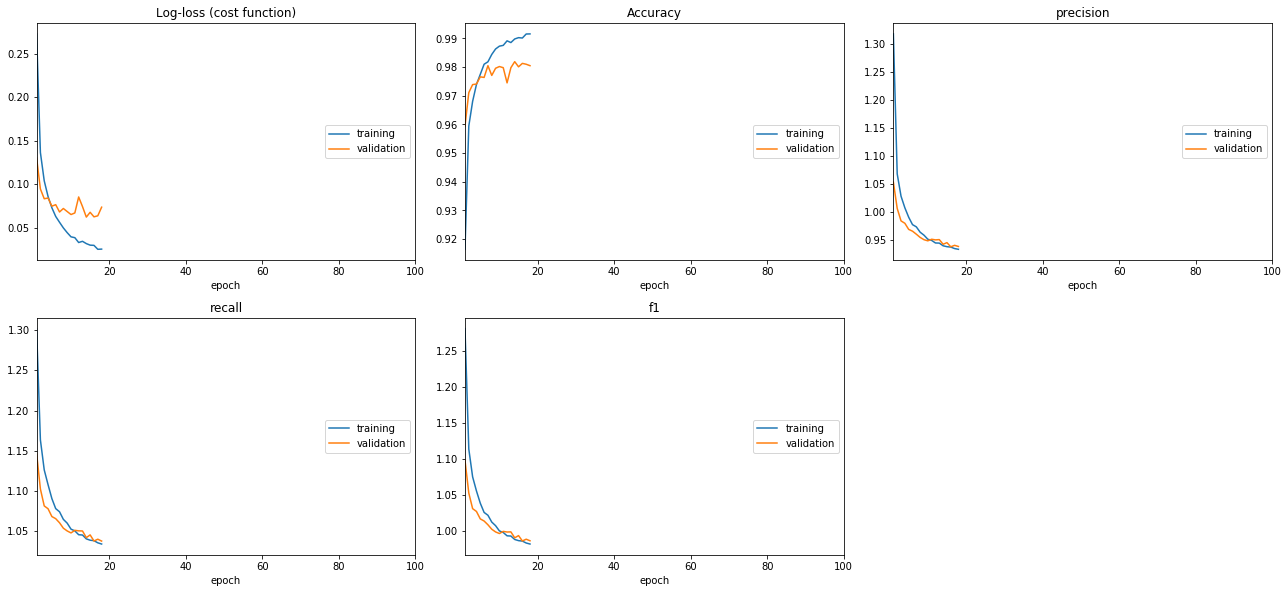

10000/10000 [==============================] - 0s 48us/step


100%|██████████| 10/10 [08:03<00:00, 48.36s/it]


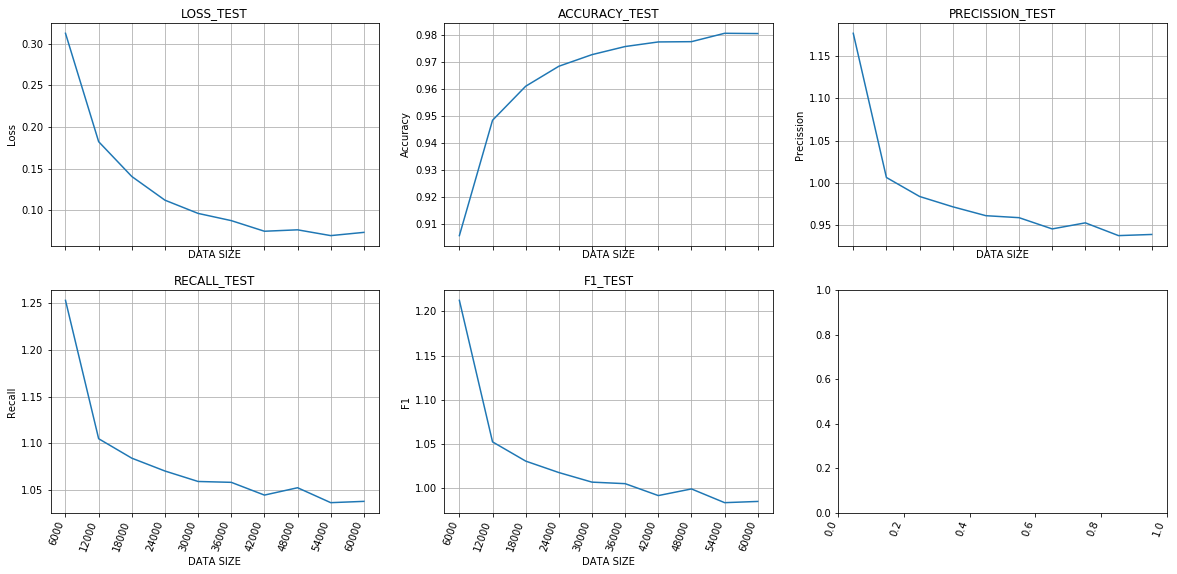

In [17]:
res11_mnist = train(build_model_mnist, X, Y, picker_simple, initial_data_random,
                    metrices_names, model_name="res11_mnist", steps=10)

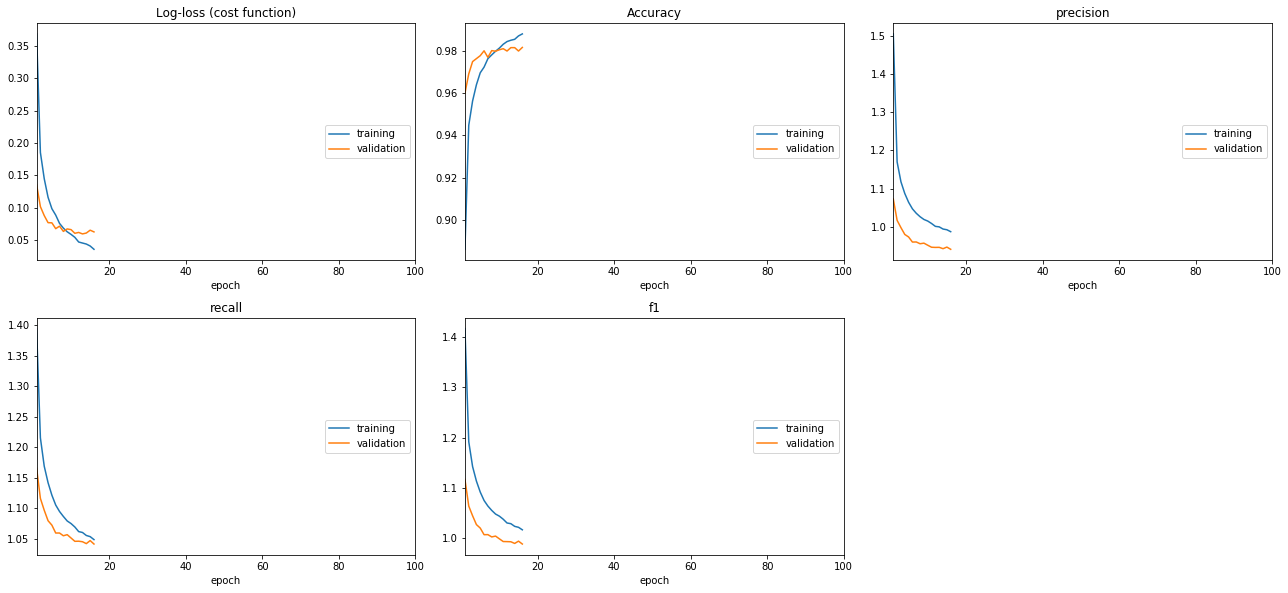

Epoch 17/100
30080/43000 [===================>..........]

KeyboardInterrupt: 

In [18]:
res12_mnist = train(build_model_mnist, X, Y, picker_max_min, initial_data_random,
                    metrices_names, model_name="res12_mnist", steps=10)

In [ ]:
res13_mnist = train(build_model_mnist, X, Y, picker_margin, initial_data_random,
                    metrices_names, model_name="res13_mnist", steps=10)

In [ ]:
res14_mnist = train(build_model_mnist, X, Y, picker_entropy, initial_data_random,
                    metrices_names, model_name="res14_mnist", steps=10)

In [ ]:
res15_mnist = train(build_model_mnist, X, Y, picker_ensemble, initial_data_random,
                    metrices_names, model_name="res15_mnist", steps=10, is_ensemble=True)

In [ ]:
res16_mnist = train(build_model_mnist, X, Y, picker_2max, initial_data_random,
                    metrices_names, model_name="res16_mnist", steps=10)

#### Join plot

In [ ]:
results1_mnist = {
    "random": res11_mnist,
    "max_mix": res12_mnist,
    "margin": res13_mnist,
    "entropy": res14_mnist,
    "ensemble": res15_mnist
}

In [ ]:
create_plot(n_cols=3, steps=10, interval=x_train.shape[0]/10, metrices_names=metrices_names, **results1_mnist)

### Initial data: The closest in cluster

In [ ]:
initial_data_closest = the_closest_in_cluster(x_train, initial_data_size=1000, nb_of_classes=10)

#### Train

In [ ]:
res21_mnist = train(build_model_mnist, X, Y, picker_simple, initial_data_closest,
                    metrices_names, model_name="res21_mnist", steps=10)

In [ ]:
res22_mnist = train(build_model_mnist, X, Y, picker_max_min, initial_data_closest,
                    metrices_names, model_name="res22_mnist", steps=10)

In [ ]:
res23_mnist = train(build_model_mnist, X, Y, picker_margin, initial_data_closest,
                    metrices_names, model_name="res23_mnist", steps=10)

In [ ]:
res24_mnist = train(build_model_mnist, X, Y, picker_entropy, initial_data_closest,
                    metrices_names, model_name="res24_mnist", steps=10)

In [ ]:
res25_mnist = train(build_model_mnist, X, Y, picker_ensemble, initial_data_closest,
                    metrices_names, model_name="res25_mnist", steps=10, is_ensemble=True)

In [ ]:
res26_mnist = train(build_model_mnist, X, Y, picker_2max, initial_data_closest,
                    metrices_names, model_name="res26_mnist", steps=10)

#### Join plot

In [ ]:
results2_mnist = {
    "random": res21_mnist,
    "max_mix": res22_mnist,
    "margin": res23_mnist,
    "entropy": res24_mnist,
    "ensemble": res25_mnist
}

In [ ]:
create_plot(n_cols=3, steps=10, interval=x_train.shape[0]/10, metrices_names=metrices_names, **results2_mnist)

### Initial data: The furthest in cluster

In [ ]:
initial_data_furthest = the_furthest_in_cluster(x_train, initial_data_size=1000, nb_of_classes=10)

#### Train

In [ ]:
res31_mnist = train(build_model_mnist, X, Y, picker_simple, initial_data_furthest,
                    metrices_names, model_name="res31_mnist", steps=10)

In [ ]:
res32_mnist = train(build_model_mnist, X, Y, picker_max_min, initial_data_furthest,
                    metrices_names, model_name="res32_mnist", steps=10)

In [ ]:
res33_mnist = train(build_model_mnist, X, Y, picker_margin, initial_data_furthest,
                    metrices_names, model_name="res33_mnist", steps=10)

In [ ]:
res34_mnist = train(build_model_mnist, X, Y, picker_entropy, initial_data_furthest,
                    metrices_names, model_name="res34_mnist", steps=10)

In [ ]:
res35_mnist = train(build_model_mnist, X, Y, picker_ensemble, initial_data_furthest,
                    metrices_names, model_name="res35_mnist", steps=10, is_ensemble=True)

In [ ]:
res36_mnist = train(build_model_mnist, X, Y, picker_2max, initial_data_furthest,
                    metrices_names, model_name="res36_mnist", steps=10)

#### Join plot

In [ ]:
results3_mnist = {
    "random": res31_mnist,
    "max_mix": res32_mnist,
    "margin": res33_mnist,
    "entropy": res34_mnist,
    "ensemble": res35_mnist
}

In [ ]:
create_plot(n_cols=3, steps=10, interval=x_train.shape[0]/10, metrices_names=metrices_names, **results3_mnist)

### Initial data: Middle in cluster

In [ ]:
initial_data_middle = middle_in_cluster(x_train, initial_data_size=1000, nb_of_classes=10)

#### Train

In [ ]:
res41_mnist = train(build_model_mnist, X, Y, picker_simple, initial_data_middle,
                    metrices_names, model_name="res41_mnist", steps=10)

In [ ]:
res42_mnist = train(build_model_mnist, X, Y, picker_max_min, initial_data_middle,
                    metrices_names, model_name="res42_mnist", steps=10)

In [ ]:
res43_mnist = train(build_model_mnist, X, Y, picker_margin, initial_data_middle,
                    metrices_names, model_name="res43_mnist", steps=10)

In [ ]:
res44_mnist = train(build_model_mnist, X, Y, picker_entropy, initial_data_middle,
                    metrices_names, model_name="res44_mnist", steps=10)

In [ ]:
res45_mnist = train(build_model_mnist, X, Y, picker_ensemble, initial_data_middle,
                    metrices_names, model_name="res45_mnist", steps=10, is_ensemble=True)

In [ ]:
res46_mnist = train(build_model_mnist, X, Y, picker_2max, initial_data_middle,
                    metrices_names, model_name="res46_mnist", steps=10)

#### Join plot

In [ ]:
results4_mnist = {
    "random": res41_mnist,
    "max_mix": res42_mnist,
    "margin": res43_mnist,
    "entropy": res44_mnist,
    "ensemble": res45_mnist
}

In [ ]:
create_plot(n_cols=3, steps=10, interval=x_train.shape[0]/10, metrices_names=metrices_names, **results4_mnist)

## Fashion Mnist

In [ ]:
from preprocessing_data import load_fashion_mnist_data
from models import build_model_fashion_mnist

In [ ]:
(x_train, y_train),(x_test, y_test) = load_fashion_mnist_data()

In [ ]:
X = (x_train, x_test)
Y = (y_train, y_test)

### Applied model

In [ ]:
image_gen = ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

image_gen.fit(x_train, augment=True)

In [ ]:
model_fashion_mnist = build_model_fashion_mnist()
model_fashion_mnist.fit_generator(image_gen.flow(x_train, y_train, batch_size=128),
        steps_per_epoch=x_train.shape[0]//128,
        validation_data=[x_test, y_test],
        epochs=20,
        callbacks=callbacks)

### Initial data: Random

In [ ]:
initial_data_random = random_strategy(x_train, initial_data_size=1000, nb_of_classes=10)

#### Train

In [ ]:
res11_fashion_mnist = train(build_model_fashion_mnist, X, Y, picker_simple, initial_data_random,
                            metrices_names, model_name="res11_fashion_mnist", steps=10)

In [ ]:
res12_fashion_mnist = train(build_model_fashion_mnist, X, Y, picker_max_min, initial_data_random,
                            metrices_names, model_name="res12_fashion_mnist", steps=10)

In [ ]:
res13_fashion_mnist = train(build_model_fashion_mnist, X, Y, picker_margin, initial_data_random,
                            metrices_names, model_name="res13_fashion_mnist", steps=10)

In [ ]:
res14_fashion_mnist = train(build_model_fashion_mnist, X, Y, picker_entropy, initial_data_random,
                            metrices_names, model_name="res14_fashion_mnist", steps=10)

In [ ]:
res15_fashion_mnist = train(build_model_fashion_mnist, X, Y, picker_ensemble, initial_data_random, metrices_names,
                            metrices_names, model_name="res15_fashion_mnist", steps=10, is_ensemble=True)

#### Join plot

In [ ]:
results1_fashion_mnist = {
    "random": res11_fashion_mnist,
    "max_mix": res12_fashion_mnist,
    "margin": res13_fashion_mnist,
    "entropy": res14_fashion_mnist,
    "ensemble": res15_fashion_mnist
}

In [ ]:
create_plot(n_cols=3, steps=10, interval=x_train.shape[0]/10, metrices_names=metrices_names, **results1_fashion_mnist)

### Initial data: The closest in cluster

In [ ]:
initial_data_closest = the_closest_in_cluster(x_train, initial_data_size=1000, nb_of_classes=10)

#### Train

In [ ]:
res21_fashion_mnist = train(build_model_fashion_mnist, X, Y, picker_simple, initial_data_closest,
                            metrices_names, model_name="res21_fashion_mnist", steps=10)

In [ ]:
res22_fashion_mnist = train(build_model_fashion_mnist, X, Y, picker_max_min, initial_data_closest,
                            metrices_names, model_name="res22_fashion_mnist", steps=10)

In [ ]:
res23_fashion_mnist = train(build_model_fashion_mnist, X, Y, picker_margin, initial_data_closest,
                            metrices_names, model_name="res23_fashion_mnist", steps=10)

In [ ]:
res24_fashion_mnist = train(build_model_fashion_mnist, X, Y, picker_entropy, initial_data_closest,
                            metrices_names, model_name="res24_fashion_mnist", steps=10)

In [ ]:
res25_fashion_mnist = train(build_model_fashion_mnist, X, Y, picker_ensemble, initial_data_closest,
                            metrices_names, model_name="res25_fashion_mnist", steps=10, is_ensemble=True)

#### Join plot

In [ ]:
results2_fashion_mnist = {
    "random": res21_fashion_mnist,
    "max_mix": res22_fashion_mnist,
    "margin": res23_fashion_mnist,
    "entropy": res24_fashion_mnist,
    "ensemble": res25_fashion_mnist
}

In [ ]:
create_plot(n_cols=3, steps=10, interval=x_train.shape[0]/10, metrices_names=metrices_names, **results2_fashion_mnist)

### Initial data: The furthest in cluster

In [ ]:
initial_data_furthest = the_furthest_in_cluster(x_train, initial_data_size=1000, nb_of_classes=10)

#### Train

In [ ]:
res31_fashion_mnist = train(build_model_fashion_mnist, X, Y, picker_simple, initial_data_furthest,
                            metrices_names, model_name="res31_fashion_mnist", steps=10)

In [ ]:
res32_fashion_mnist = train(build_model_fashion_mnist, X, Y, picker_max_min, initial_data_furthest,
                            metrices_names, model_name="res32_fashion_mnist", steps=10)

In [ ]:
res33_fashion_mnist = train(build_model_fashion_mnist, X, Y, picker_margin, initial_data_furthest,
                            metrices_names, model_name="res33_fashion_mnist", steps=10)

In [ ]:
res34_fashion_mnist = train(build_model_fashion_mnist, X, Y, picker_entropy, initial_data_furthest,
                            metrices_names, model_name="res34_fashion_mnist", steps=10)

In [ ]:
res35_fashion_mnist = train(build_model_fashion_mnist, X, Y, picker_ensemble, initial_data_furthest,
                            metrices_names, model_name="res35_fashion_mnist", steps=10, is_ensemble=True)

In [ ]:
res36_fashion_mnist = train(build_model_fashion_mnist, X, Y, picker_simple, initial_data_furthest,
                            metrices_names, model_name="res36_fashion_mnist", steps=10)

#### Join plot

In [ ]:
results3_fashion_mnist = {
    "random": res31_fashion_mnist,
    "max_mix": res32_fashion_mnist,
    "margin": res33_fashion_mnist,
    "entropy": res34_fashion_mnist,
    "ensemble": res35_fashion_mnist
}

In [ ]:
create_plot(n_cols=3, steps=10, interval=x_train.shape[0]/10, metrices_names=metrices_names, **results3_fashion_mnist)

### Initial data: Middle in cluster

In [ ]:
initial_data_middle = middle_in_cluster(x_train, initial_data_size=1000, nb_of_classes=10)

#### Train

In [ ]:
res41_fashion_mnist = train(build_model_fashion_mnist, X, Y, picker_simple, initial_data_middle,
                            metrices_names, model_name="res41_fashion_mnist", steps=10)

In [ ]:
res42_fashion_mnist = train(build_model_fashion_mnist, X, Y, picker_max_min, initial_data_middle,
                            metrices_names, model_name="res42_fashion_mnist", steps=10)

In [ ]:
res43_fashion_mnist = train(build_model_fashion_mnist, X, Y, picker_margin, initial_data_middle,
                            metrices_names, model_name="res43_fashion_mnist", steps=10)

In [ ]:
res44_fashion_mnist = train(build_model_fashion_mnist, X, Y, picker_entropy, initial_data_middle,
                            metrices_names, model_name="res44_fashion_mnist", steps=10)

In [ ]:
res45_fashion_mnist = train(build_model_fashion_mnist, X, Y, picker_ensemble, initial_data_middle,
                            metrices_names, model_name="res45_fashion_mnist", steps=10, is_ensemble=True)

In [ ]:
res46_fashion_mnist = train(build_model_fashion_mnist, X, Y, picker_simple, initial_data_middle,
                            metrices_names, model_name="res46_fashion_mnist", steps=10)

#### Join plot

In [ ]:
results4_fashion_mnist = {
    "random": res41_fashion_mnist,
    "max_mix": res42_fashion_mnist,
    "margin": res43_fashion_mnist,
    "entropy": res44_fashion_mnist,
    "ensemble": res45_fashion_mnist
}

In [ ]:
create_plot(n_cols=3, steps=10, interval=x_train.shape[0]/10, metrices_names=metrices_names, **results4_fashion_mnist)

## Dogs vs Cats

In [ ]:
from preprocessing_data import load_pets_data
from models import build_model_pets

In [ ]:
(x_train, y_train),(x_test, y_test) = load_pets_data()

### Applied model

In [ ]:
model = build_model_pets()
model.fit(x=x_train,
          y=y_train,
          validation_data=[x_test, y_test],
          callbacks=[PlotLossesKeras(max_cols=3)],
          epochs=50,
          batch_size=128
         )

### Initial data: Random

In [ ]:
initial_data_random = random_strategy(x_train, initial_data_size=1000, nb_of_classes=10)

#### Train

In [ ]:
res11_pets = train(build_model_pets, X, Y, picker_simple, metrices_names, steps=10)

In [ ]:
res12_pets = train(build_model_pets, X, Y, picker_max_min, metrices_names, steps=10)

In [ ]:
res13_pets = train(build_model_pets, X, Y, picker_margin, metrices_names, steps=10)

In [ ]:
res14_pets = train(build_model_pets, X, Y, picker_entropy, metrices_names, steps=10)

In [ ]:
res15_pets = train(build_model_pets, X, Y, picker_ensemble, metrices_names, steps=10, is_ensemble=True)

## Cifar10

In [ ]:
from preprocessing_data import load_cifar10_data
from models import build_model_cifar10

In [ ]:
(x_train, y_train),(x_test, y_test) = load_cifar10_data()

In [ ]:
X = (x_train, x_test)
Y = (y_train, y_test)

### Applied model

In [ ]:
image_gen = ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

image_gen.fit(x_train, augment=True)

In [ ]:
model_cifar10 = build_model_cifar10()
model_cifar10.fit_generator(image_gen.flow(x_train, y_train, batch_size=128),
        steps_per_epoch=  x_train.shape[0]//128,
        validation_data=[x_test, y_test],
        epochs=100,
        callbacks=callbacks)

### Initial data: Random

In [ ]:
initial_data_random = random_strategy(x_train, initial_data_size=1000, nb_of_classes=10)

#### Train

In [ ]:
res11_cifar10 = train(build_model_cifar10, X, Y, picker_simple, initial_data_random,
                      metrices_names, model_name="res11_cifar10", steps=10)

In [ ]:
res12_cifar10 = train(build_model_cifar10, X, Y, picker_max_min, initial_data_random,
                      metrices_names, model_name="res12_cifar10", steps=10)

In [ ]:
res13_cifar10 = train(build_model_cifar10, X, Y, picker_margin, initial_data_random, 
                      metrices_names, model_name="res13_cifar10", steps=10)

In [ ]:
res14_cifar10 = train(build_model_cifar10, X, Y, picker_entropy, initial_data_random,
                      metrices_names, model_name="res14_cifar10", steps=10)

In [ ]:
res15_cifar10 = train(build_model_cifar10, X, Y, picker_ensemble, initial_data_random,
                      metrices_names, model_name="res15_cifar10", steps=10, is_ensemble=True)

In [ ]:
res16_cifar10 = train(build_model_cifar10, X, Y, picker_ensemble, initial_data_random,
                      metrices_names, model_name="res16_cifar10", steps=10)

#### Join plot

In [ ]:
results1_cifar10 = {
    "random": res11_cifar10,
    "max_mix": res12_cifar10,
    "margin": res13_cifar10,
    "entropy": res14_cifar10,
    "ensemble": res15_cifar10
}

In [ ]:
create_plot(n_cols=3, steps=10, interval=x_train.shape[0]/10, metrices_names=metrices_names, **results1_cifar10)

### Initial data: The closest in cluster

In [ ]:
initial_data_closest = the_closest_in_cluster(x_train, initial_data_size=1000, nb_of_classes=10)

#### Train

In [ ]:
res21_cifar10 = train(build_model_cifar10, X, Y, picker_simple, initial_data_closest,
                      metrices_names, model_name="res21_cifar10", steps=10)

In [ ]:
res22_cifar10 = train(build_model_cifar10, X, Y, picker_max_min, initial_data_closest,
                      metrices_names, model_name="res22_cifar10", steps=10)

In [ ]:
res23_cifar10 = train(build_model_cifar10, X, Y, picker_margin, initial_data_closest,
                      metrices_names, model_name="res23_cifar10", steps=10)

In [ ]:
res24_cifar10 = train(build_model_cifar10, X, Y, picker_entropy, initial_data_closest,
                      metrices_names, model_name="res24_cifar10", steps=10)

In [ ]:
res25_cifar10 = train(build_model_cifar10, X, Y, picker_ensemble, initial_data_closest,
                      metrices_names, model_name="res25_cifar10", steps=10, is_ensemble=True)

In [ ]:
res26_cifar10 = train(build_model_cifar10, X, Y, picker_ensemble, initial_data_closest,
                      metrices_names, model_name="res26_cifar10", steps=10)

#### Join plot

In [ ]:
results2_cifar10 = {
    "random": res21_cifar10,
    "max_mix": res22_cifar10,
    "margin": res23_cifar10,
    "entropy": res24_cifar10,
    "ensemble": res25_cifar10
}

In [ ]:
create_plot(n_cols=3, steps=10, interval=x_train.shape[0]/10, metrices_names=metrices_names, **results2_cifar10)

### Initial data: The furthest in cluster

In [ ]:
initial_data_furthest = the_furthest_in_cluster(x_train, initial_data_size=1000, nb_of_classes=10)

#### Train

In [ ]:
res31_cifar10 = train(build_model_cifar10, X, Y, picker_simple, initial_data_furthest,
                      metrices_names, model_name="res31_cifar10", steps=10)

In [ ]:
res32_cifar10 = train(build_model_cifar10, X, Y, picker_max_min, initial_data_furthest,
                      metrices_names, model_name="res32_cifar10", steps=10)

In [ ]:
res33_cifar10 = train(build_model_cifar10, X, Y, picker_margin, initial_data_furthest,
                      metrices_names, model_name="res33_cifar10", steps=10)

In [ ]:
res34_cifar10 = train(build_model_cifar10, X, Y, picker_entropy, initial_data_furthest,
                      metrices_names, model_name="res34_cifar10", steps=10)

In [ ]:
res35_cifar10 = train(build_model_cifar10, X, Y, picker_ensemble, initial_data_furthest,
                      metrices_names, model_name="res35_cifar10", steps=10, is_ensemble=True)

In [ ]:
res36_cifar10 = train(build_model_cifar10, X, Y, picker_simple, initial_data_furthest,
                      metrices_names, model_name="res36_cifar10", steps=10)

#### Join plot

In [ ]:
results3_cifar10 = {
    "random": res31_cifar10,
    "max_mix": res32_cifar10,
    "margin": res33_cifar10,
    "entropy": res34_cifar10,
    "ensemble": res35_cifar10
}

In [ ]:
create_plot(n_cols=3, steps=10, interval=x_train.shape[0]/10, metrices_names=metrices_names, **results3_cifar10)

### Initial data: Middle in cluster

In [ ]:
initial_data_middle = middle_in_cluster(x_train, initial_data_size=1000, nb_of_classes=10)

#### Train

In [ ]:
res41_cifar10 = train(build_model_cifar10, X, Y, picker_simple, initial_data_middle,
                      metrices_names, model_name="res41_cifar10", steps=10)

In [ ]:
res42_cifar10 = train(build_model_cifar10, X, Y, picker_max_min, initial_data_middle,
                      metrices_names, model_name="res42_cifar10", steps=10)

In [ ]:
res43_cifar10 = train(build_model_cifar10, X, Y, picker_margin, initial_data_middle,
                      metrices_names, model_name="res43_cifar10", steps=10)

In [ ]:
res44_cifar10 = train(build_model_cifar10, X, Y, picker_entropy, initial_data_middle,
                      metrices_names, model_name="res44_cifar10", steps=10)

In [ ]:
res45_cifar10 = train(build_model_cifar10, X, Y, picker_ensemble, initial_data_middle,
                      metrices_names, model_name="res45_cifar10", steps=10, is_ensemble=True)

In [ ]:
res46_cifar10 = train(build_model_cifar10, X, Y, picker_ensemble,
                      metrices_names, model_name="res46_cifar10", steps=10)

#### Join plot

In [ ]:
results4_cifar10 = {
    "random": res41_cifar10,
    "max_mix": res42_cifar10,
    "margin": res43_cifar10,
    "entropy": res44_cifar10,
    "ensemble": res45_cifar10
}

In [ ]:
create_plot(n_cols=3, steps=10, interval=x_train.shape[0]/10, metrices_names=metrices_names, **results4_cifar10)

## Cifar100

In [ ]:
from preprocessing_data import load_cifar100_data
from models import build_model_cifar100

In [ ]:
(x_train, y_train),(x_test, y_test) = load_cifar100_data()

### Applied model

In [ ]:
image_gen = ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

image_gen.fit(x_train, augment=True)

In [ ]:
model_cifar100 = build_model_cifar100()
model_cifar100.fit_generator(image_gen.flow(x_train, y_train, batch_size=128),
        steps_per_epoch=  x_train.shape[0]//128,
        validation_data=[x_test, y_test],
        epochs=100,
        callbacks = [PlotLossesKeras()])

### Initial data: Random

In [ ]:
initial_data_random = random_strategy(x_train, initial_data_size=1000, nb_of_classes=10)

#### Train

In [ ]:
cifar100_res1 = train(build_model_cifar100, X, Y, picker_simple, initial_data_random,
                      metrices_names, model_name="cifar100_res1", steps=10)

In [ ]:
cifar100_res2 = train(build_model_cifar100, X, Y, picker_max_min, initial_data_random,
                      metrices_names, model_name="cifar100_res2", steps=10)

In [ ]:
cifar100_res3 = train(build_model_cifar100, X, Y, picker_margin, initial_data_random,
                      metrices_names, model_name="cifar100_res3", steps=10)

In [ ]:
cifar100_res4 = train(build_model_cifar100, X, Y, picker_entropy, initial_data_random,
                      metrices_names, model_name="cifar100_res4", steps=10)

In [ ]:
cifar100_res5 = train(build_model_cifar100, X, Y, picker_ensemble, initial_data_random,
                      metrices_names, model_name="cifar100_res5", steps=10, is_ensemble=True)

#### Join plot

In [ ]:
results1_cifar100 = {
    "random": res11_cifar100,
    "max_mix": res12_cifar100,
    "margin": res13_cifar100,
    "entropy": res14_cifar100,
    "ensemble": res15_cifar100
}

In [ ]:
create_plot(n_cols=3, steps=10, interval=x_train.shape[0]/10, metrices_names=metrices_names, **results1_cifar100)